2025-05-27 10:25:16.247977: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 10:25:16.266502: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 10:25:16.536712: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 10:25:16.648509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748341516.943075    3474 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748341517.01

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 0.1834 - loss: 4.3658 - val_accuracy: 0.5096 - val_loss: 1.6245
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accuracy: 0.6218 - loss: 1.3164 - val_accuracy: 0.7771 - val_loss: 0.8214
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.8323 - loss: 0.5698 - val_accuracy: 0.6975 - val_loss: 0.8655
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.8962 - loss: 0.3892 - val_accuracy: 0.8662 - val_loss: 0.4496
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.9683 - loss: 0.1378 - val_accuracy: 0.8854 - val_loss: 0.4177
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.9759 - loss: 0.0938 - val_accuracy: 0.8885 - val_loss: 0.3500
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.9967 - loss: 0.0373 - val_accuracy: 0.9108 - val_loss: 0.3359
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - accuracy: 0.9974 - loss: 0.0214 - val_accu

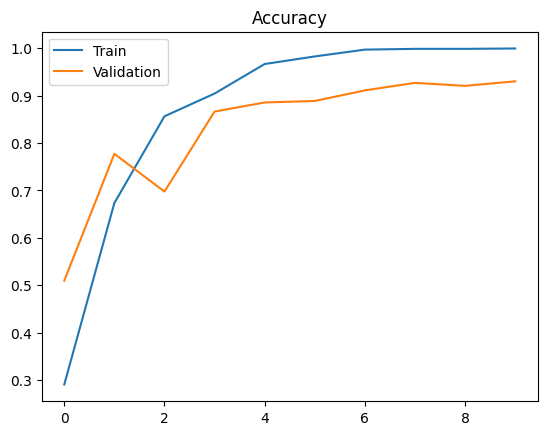

In [1]:
# Bildverarbeitung & Klassifikation (PIL statt OpenCV)
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# CSV einlesen
df = pd.read_csv("metadata.csv")

# Nur Bilder verwenden, die tatsächlich vorhanden sind
df = df[df["image_name"].apply(lambda x: os.path.exists(os.path.join("images", x)))]

# Top-Marken (mind. 50 Bilder)
top_brands = df["brand"].value_counts()[df["brand"].value_counts() >= 50].index
df = df[df["brand"].isin(top_brands)].reset_index(drop=True)

# Labels kodieren
le = LabelEncoder()
df["label"] = le.fit_transform(df["brand"])

# Bilder laden mit PIL
images = []
labels = []

for _, row in df.iterrows():
    img_path = os.path.join("images", row["image_name"])
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        images.append(img_array)
        labels.append(row["label"])
    except:
        continue  # falls ein Bild beschädigt ist

X = np.array(images)
y = to_categorical(labels)

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN-Modell bauen
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

# Kompilieren & Trainieren
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Bewertung & Plot
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Genauigkeits-Plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()


In [2]:
# CSV laden
df = pd.read_csv("metadata.csv")

# Bilderordner
image_folder = "images"

# Nur Bilder verwenden, die vorhanden sind
df = df[df["image_name"].apply(lambda x: os.path.isfile(os.path.join(image_folder, x)))]

# Nur Marken mit genügend Bildern
top_brands = df["brand"].value_counts()[df["brand"].value_counts() >= 50].index
df = df[df["brand"].isin(top_brands)].reset_index(drop=True)

# Label-Encoding
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["brand"])

In [10]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the metadata
df = pd.read_csv("metadata.csv")

# Define image folder path (update if needed)
image_folder = "images/"

# Prepare lists for images and labels
images = []
labels = []

# Encode labels (brands)
le = LabelEncoder()
df['brand_encoded'] = le.fit_transform(df['brand'])

# Load and preprocess images
for _, row in df.iterrows():
    img_path = os.path.join(image_folder, row["image_name"])
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Warning: Could not read image {img_path}")
        continue

    img = cv2.resize(img, (128, 128)) / 255.0  # Normalize
    images.append(img)
    labels.append(row["brand_encoded"])

# Convert to arrays
X = np.array(images)
y = to_categorical(labels)

# Print shape summary
print("Image data shape:", X.shape)
print("Label shape:", y.shape)
print("Number of classes:", y.shape[1])


ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [ ]:
# Genauigkeit anzeigen
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Trainingsverlauf
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()
